

> ### Import libraries



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

### Opening and preprocessing the data

In [ ]:
path = '1661-0.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [ ]:
file = open("1661-0.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [ ]:
len(data)

573660

 ### Apply tokenization

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164, 2165, 27, 987, 14, 22]

In [ ]:
len(sequence_data)

108958

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8624


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]
Response:  [ 986    5  125   33   46  556 2164 2165   27  987]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Applying tokenization

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 10)             86240     
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 1000)           4044000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 8624)              8632624   
Total params: 21,767,864
Trainable params: 21,767,864
Non-trainable params: 0
_________________________________________________________________


### Plotting the model

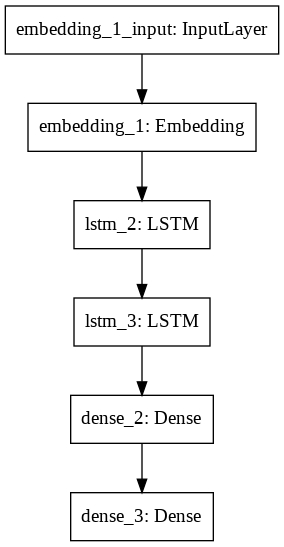

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

### Training the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=30, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1703/1703 [==============================] - 1029s 602ms/step - loss: 6.4092

Epoch 00001: loss improved from inf to 6.40917, saving model to next_words.h5
Epoch 2/70
1703/1703 [==============================] - 1029s 604ms/step - loss: 5.8207

Epoch 00002: loss improved from 6.40917 to 5.82071, saving model to next_words.h5
Epoch 3/70
1703/1703 [==============================] - 1002s 588ms/step - loss: 5.4779

Epoch 00003: loss improved from 5.82071 to 5.47788, saving model to next_words.h5
Epoch 4/70
1703/1703 [==============================] - 981s 576ms/step - loss: 5.1989

Epoch 00004: loss improved from 5.47788 to 5.19893, saving model to next_words.h5
Epoch 5/70
1703/1703 [==============================] - 1011s 593ms/step - loss: 4.9636

Epoch 00005: loss improved from 5.19893 to 4.96364, saving model to next_words.h5
Epoch 6/70
1703/1703 [==============================] - 1013s 595ms/step - loss: 4.7397

Epoch 00006: loss improved from 4.96364 to 4.73973, saving mo

### Prediction

In [ ]:
# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue